In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("cleaned_ebay_deals.csv")

Time Series Analysis

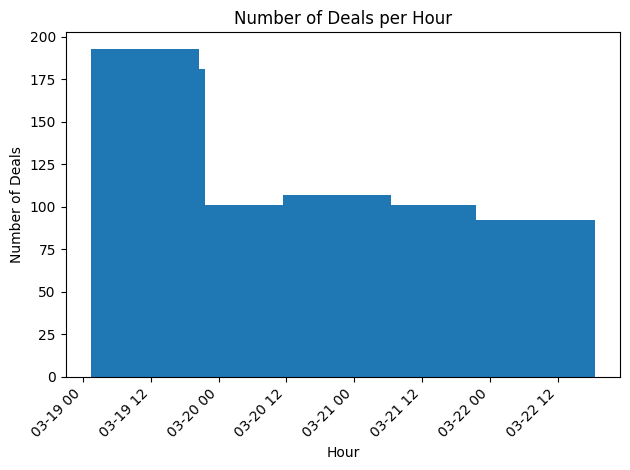

In [10]:
# Time Series Analysis
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Sort the DataFrame by timestamp
df.sort_values(by='timestamp', inplace=True)

# Set the timestamp as the index (helps with resampling and plotting time series)
df.set_index('timestamp', inplace=True)

hourly_data = df.resample("H").size()

fig, ax = plt.subplots()

ax.bar(hourly_data.index, hourly_data.values)
ax.set_ylabel('Number of Deals')  
ax.set_xlabel('Hour')
ax.set_title('Number of Deals per Hour')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() #prevents label overlap

plt.show()

Price and Discount Analysis

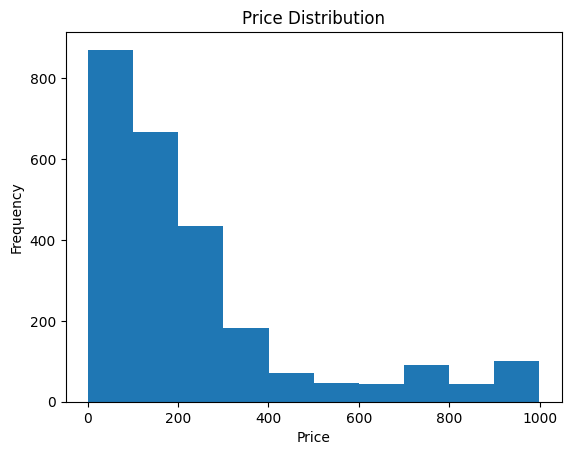

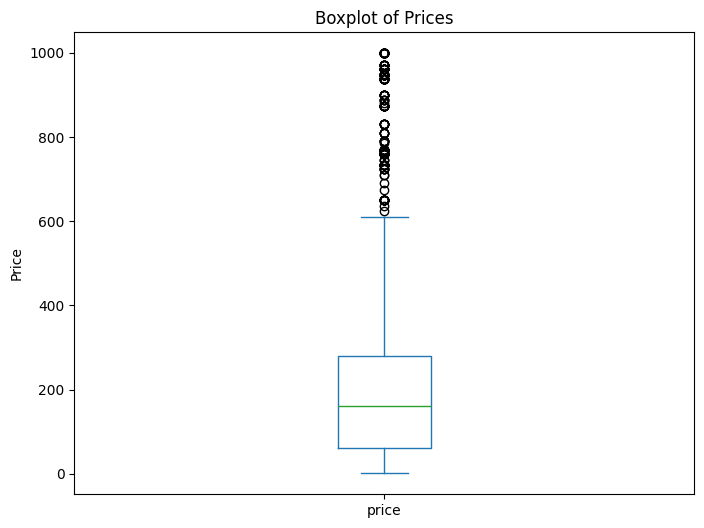

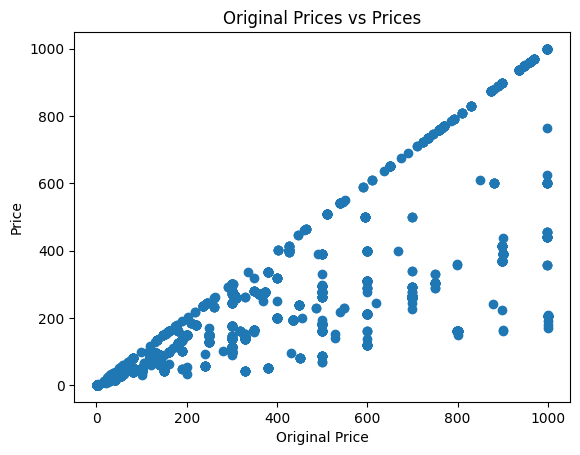

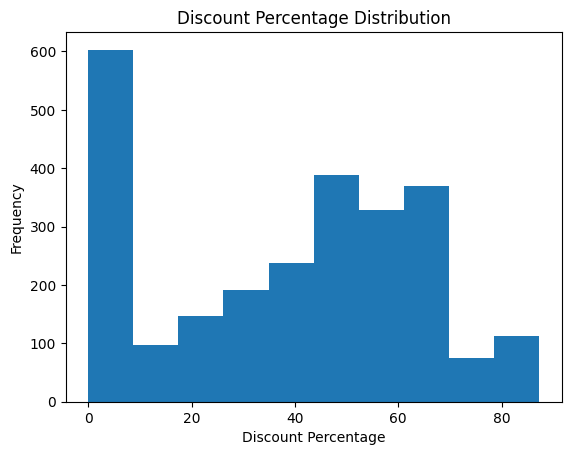

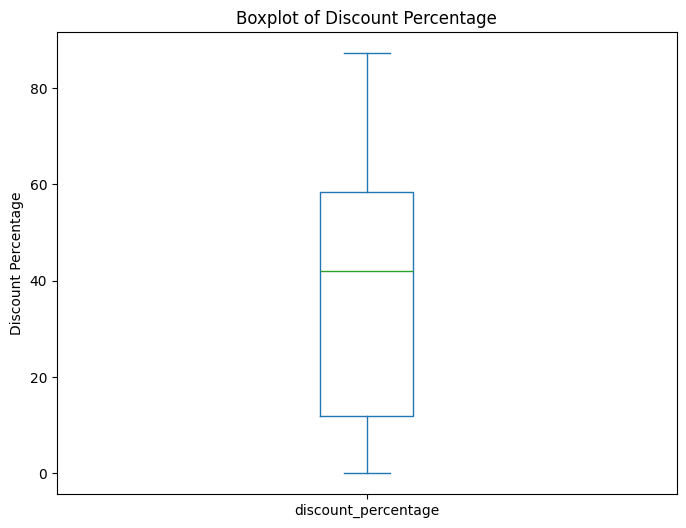

In [11]:
#Price and Discount Analysis

# Plot a histogram and boxplot to visualize the distribution of product prices. 
counts, bins = np.histogram(df['price'].values)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

df['price'].plot(kind='box', vert=True, figsize=(8,6))
plt.title("Boxplot of Prices")
plt.ylabel("Price")
plt.show()

#scatter plot comparing original_price versus price.
plt.scatter(df['original_price'].values, df['price'].values)
plt.title("Original Prices vs Prices")
plt.xlabel("Original Price")
plt.ylabel("Price")
plt.show()

#the distribution of the discount_percentage to analyze how discounts vary
counts, bins = np.histogram(df['discount_percentage'].values)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.title("Discount Percentage Distribution")
plt.show()

df['discount_percentage'].plot(kind='box', vert=True, figsize=(8,6))
plt.title("Boxplot of Discount Percentage")
plt.ylabel("Discount Percentage")
plt.show()

Shipping Information Analysis

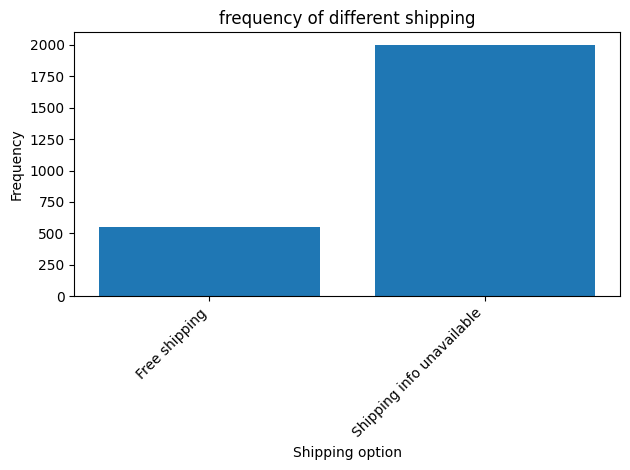

In [12]:
#Shipping Information Analysis
# Count the frequency of different shipping options.
shipping_options = df['shipping'].unique()
counts=[]
for op in shipping_options:
    counts.append((df['shipping']==op).sum())

fig, ax = plt.subplots()

ax.bar(shipping_options, counts)
ax.set_ylabel('Frequency')  
ax.set_xlabel('Shipping option')
ax.set_title('frequency of different shipping')

plt.xticks(rotation=45, ha='right') 
plt.tight_layout() #prevents label overlap

plt.show()

Text Analysis on Product Titles

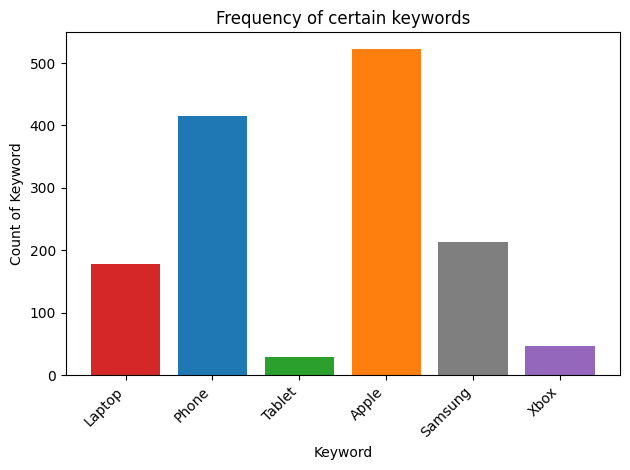

In [13]:
keywords = ["Laptop", "Phone", "Tablet", "Apple", "Samsung", "Xbox"]
count_of_keywords = []
for word in keywords:
    count = df['title'].str.lower().str.contains(word.lower(), na=False).sum()
    count_of_keywords.append(count)

fig, ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:gray', 'tab:purple']

ax.bar(keywords, count_of_keywords, color=bar_colors)

ax.set_ylabel('Count of Keyword')
ax.set_xlabel('Keyword')
ax.set_title('Frequency of certain keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Price Difference Analysis

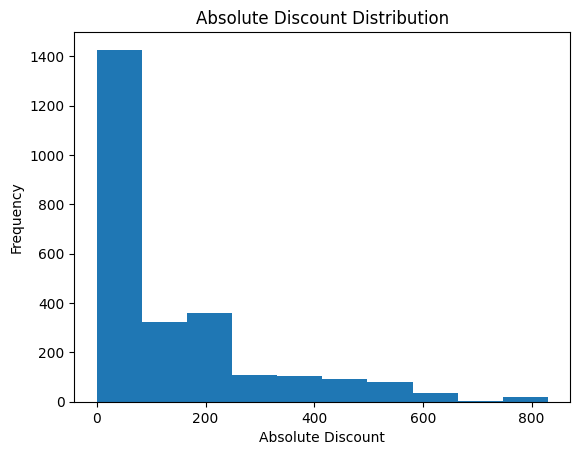

In [14]:
df["absolute_discount"] = df['original_price'] - df['price']

counts, bins = np.histogram(df['absolute_discount'].values)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel("Absolute Discount")
plt.ylabel("Frequency")
plt.title("Absolute Discount Distribution")
plt.show()

Discount

In [15]:
df.sort_values("discount_percentage", inplace=True, ascending=False)

df.head(5)


,Unnamed: 0,title,price,original_price,item_url,shipping,discount_percentage,absolute_discount
timestamp,,,,,,,,
2025-03-20 15:16:49,1144,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.0,https://www.ebay.com/itm/387587045897?_trkparm...,Shipping info unavailable,87.25,287.05
2025-03-20 03:25:58,766,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.0,https://www.ebay.com/itm/387587045897?_trkparm...,Shipping info unavailable,87.25,287.05
2025-03-20 09:16:29,975,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.0,https://www.ebay.com/itm/387587045897?_trkparm...,Free shipping,87.25,287.05
2025-03-20 06:21:01,858,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.0,https://www.ebay.com/itm/387587045897?_trkparm...,Shipping info unavailable,87.25,287.05
2025-03-20 01:09:25,690,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.0,https://www.ebay.com/itm/387587045897?_trkparm...,Free shipping,87.25,287.05
